In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
141,5,106,82,30,0,39.5,0.286,38,0


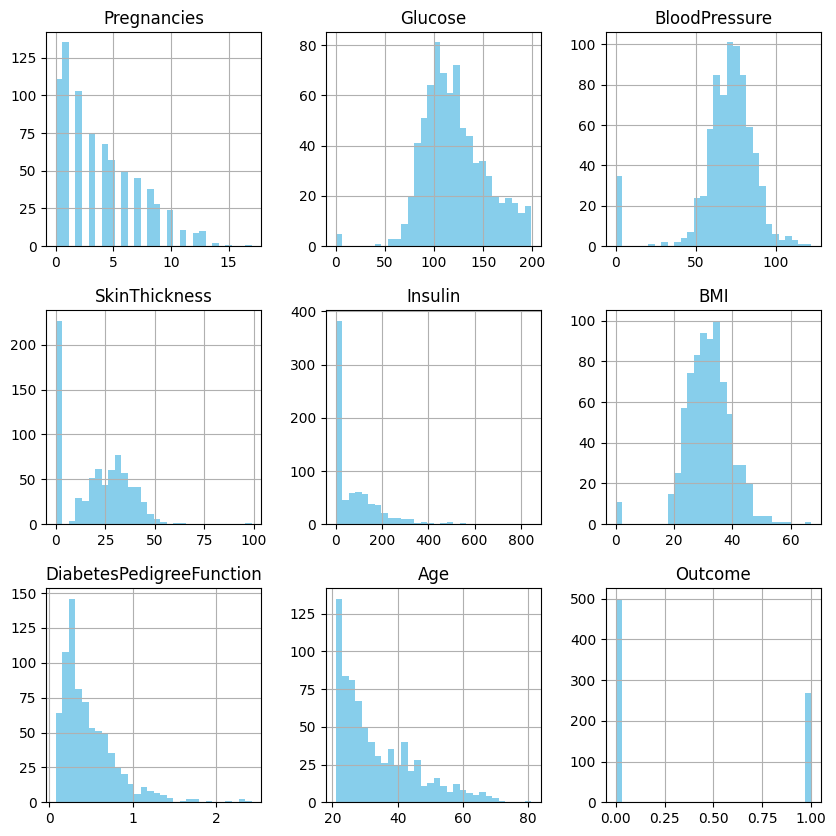

In [9]:
df.hist(figsize=(10, 10), bins=30,color="skyblue");

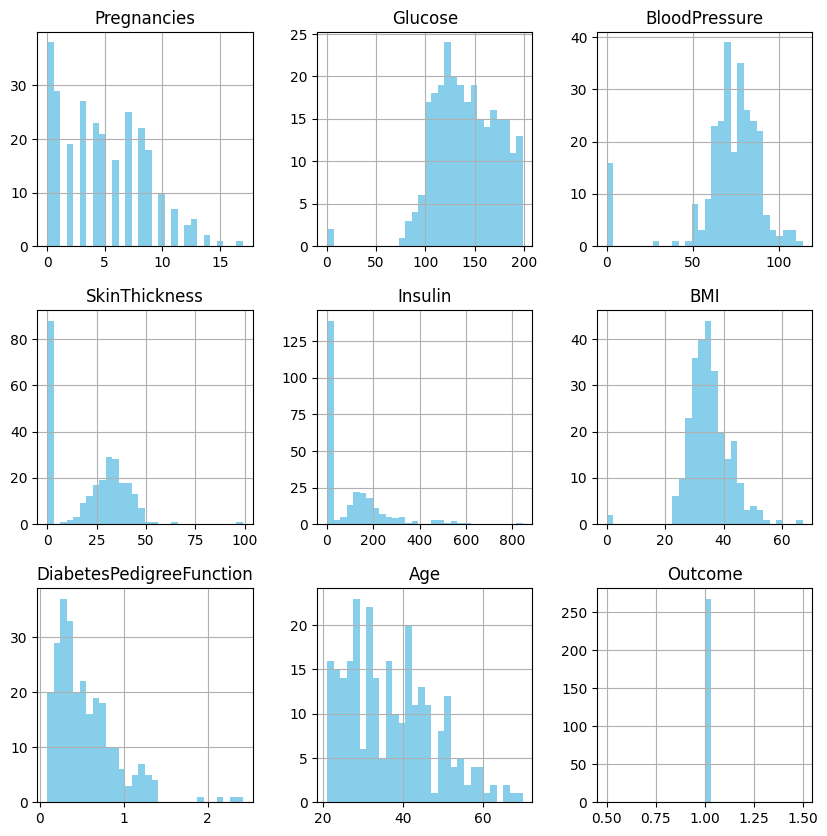

In [23]:
df[df["Outcome"]==1].hist(figsize=(10, 10), bins=30,color="skyblue");

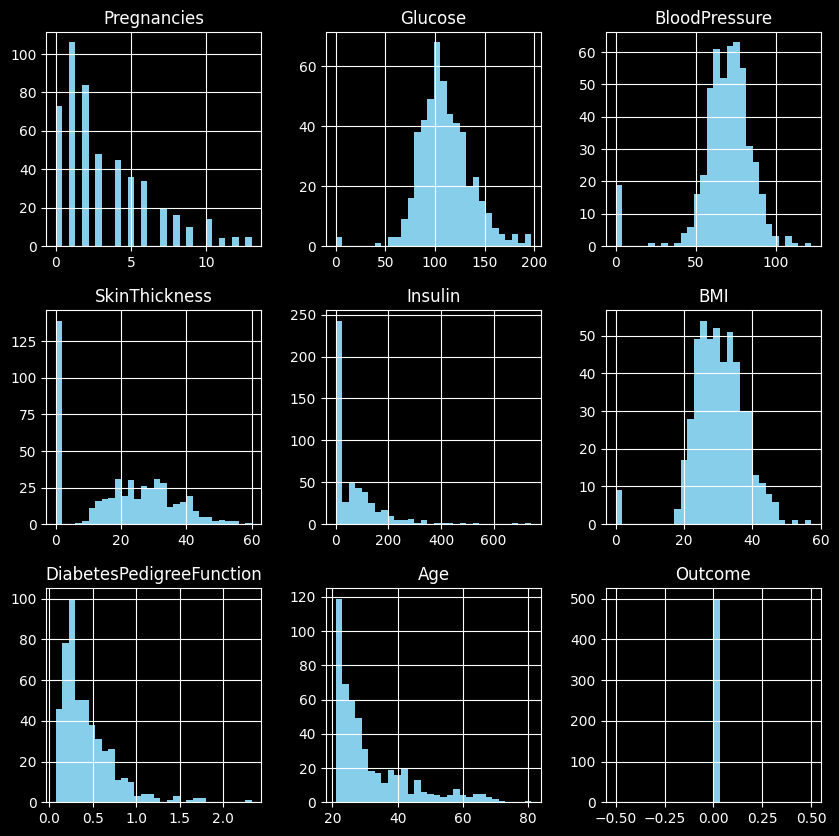

In [59]:
df[df["Outcome"]==0].hist(figsize=(10, 10), bins=30,color="skyblue");

C:\Users\Graphic\AppData\Local\Temp\ipykernel_26752\1782131001.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts = df.groupby(['AgeRange', 'Outcome']).size().unstack(fill_value=0)


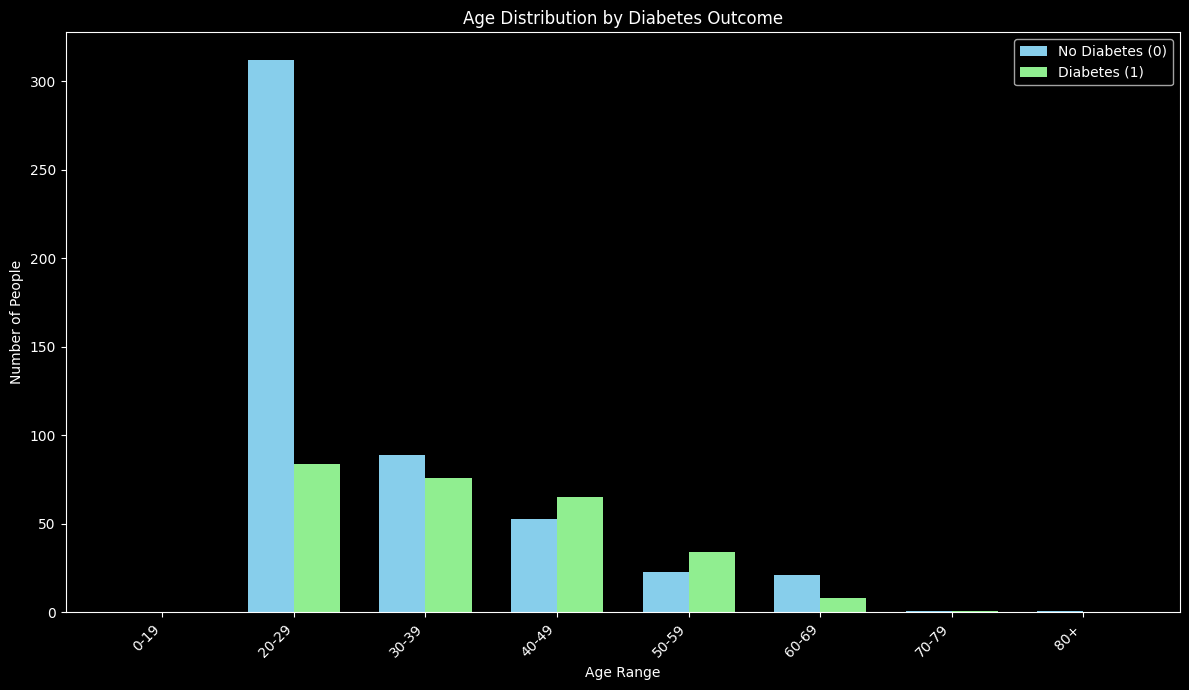

In [65]:
bins_age = [0, 20, 30, 40, 50, 60, 70, 80, 100]
labels_age = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']


df['AgeRange'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

age_counts = df.groupby(['AgeRange', 'Outcome']).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 7))
plt.style.use('dark_background')
x = range(len(age_counts))

plt.bar([i - width/2 for i in x], age_counts[0], width=width, label='No Diabetes (0)', color='skyblue')

plt.bar([i + width/2 for i in x], age_counts[1], width=width, label='Diabetes (1)', color='lightgreen')

plt.xticks(ticks=x, labels=age_counts.index, rotation=45, ha='right')
plt.xlabel('Age Range')
plt.ylabel('Number of People')
plt.title('Age Distribution by Diabetes Outcome')
plt.legend()
plt.tight_layout()




C:\Users\Graphic\AppData\Local\Temp\ipykernel_26752\947582066.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insulin_counts = df.groupby(['InsulinRange', 'Outcome']).size().unstack(fill_value=0)


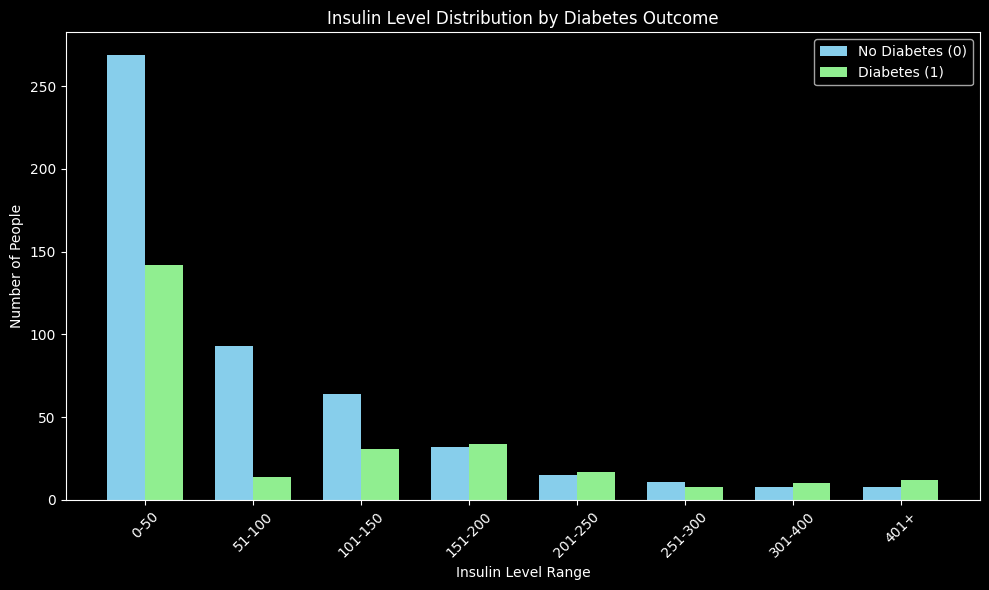

In [63]:
bins = [0, 50, 100, 150, 200, 250, 300, 400, 900]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-400', '401+']

# Create binned insulin ranges
df['InsulinRange'] = pd.cut(df['Insulin'], bins=bins, labels=labels, right=False)

# Count frequencies of insulin ranges for each outcome
insulin_counts = df.groupby(['InsulinRange', 'Outcome']).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(insulin_counts))

plt.bar([i - width/2 for i in x], insulin_counts[0], width=width, label='No Diabetes (0)', color='skyblue')
plt.bar([i + width/2 for i in x], insulin_counts[1], width=width, label='Diabetes (1)', color='lightgreen')

plt.xticks(ticks=x, labels=insulin_counts.index, rotation=45)
plt.xlabel('Insulin Level Range')
plt.ylabel('Number of People')
plt.title('Insulin Level Distribution by Diabetes Outcome')
plt.legend()
plt.tight_layout()
plt.show()